In [2]:
import numpy as np
X = np.random.rand(100,2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


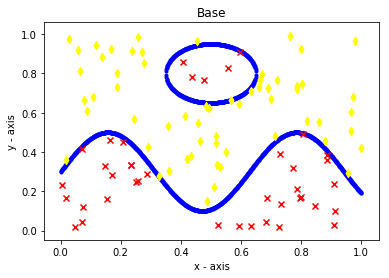

In [5]:
import matplotlib.pyplot as plt 
import matplotlib
x_blueline = np.linspace(0,1,1000)
Y1 = (1/5)*np.sin(10*x_blueline[:]) + 0.3  
Y2 = np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8
Y3 = - np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8
  
plt.scatter(x_blueline, Y1, marker = ".", color = "blue") 
plt.scatter(x_blueline, Y2, marker = ".", color = "blue")
plt.scatter(x_blueline, Y3, marker = ".", color = "blue")

d = np.zeros(100) 
for i in range(100):
    A = (1/5)*np.sin(10*X[i,0]) + 0.3 
    B = (X[i,1] - 0.8)**2 + (X[i,0] - 0.5)**2
    if (X[i,1] < A) or (B < .15**2):
        d[i] = 1
        plt.scatter(X[i,0],X[i,1], color = "red", marker = "x")
    else:
        d[i] = -1
        plt.scatter(X[i,0],X[i,1], color = "yellow", marker = "d")
  
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('Base') 
plt.show() 

### C1 K means:

In [7]:
import random
ones = [i for i in range(100) if d[i] == 1] 
initPosCenters = random.sample(ones, k=10)
print('10 random: ', initPosCenters)
C1 = [[X[i][0], X[i][1]] for i in range(100) if d[i] == 1]

10 random:  [74, 97, 55, 89, 11, 72, 84, 85, 18, 60]


In [8]:
import sys

randomCentersC1 =  X[initPosCenters[:]]
for k in range(5):
    weights = np.zeros((10,3))
    for x in C1:
        minDist = sys.float_info.max
        index = 0;
        for j in randomCentersC1:
            dist = (x[0] - j[0])**2 + (x[1] - j[1])**2
            if dist < minDist:
                minDist = dist
                minDistIndex = index
            index += 1
        weights[minDistIndex][0] += x[0]
        weights[minDistIndex][1] += x[1]
        weights[minDistIndex][2] += 1
    for j in range(10): 
        randomCentersC1[j][0] = weights[j][0] / weights[j][2]
        randomCentersC1[j][1] = weights[j][1] / weights[j][2]

    print("centroids: ", randomCentersC1)    

centroids:  [[0.91137499 0.06446429]
 [0.6840841  0.04331904]
 [0.16244691 0.29040808]
 [0.77424783 0.16290501]
 [0.05857263 0.03234162]
 [0.58336799 0.02516897]
 [0.59794681 0.66753333]
 [0.90962518 0.23593192]
 [0.72817765 0.0176554 ]
 [0.88618852 0.37142413]]
centroids:  [[0.91137499 0.06446429]
 [0.6840841  0.04331904]
 [0.18198612 0.31519901]
 [0.77424783 0.16290501]
 [0.05189215 0.08700205]
 [0.58336799 0.02516897]
 [0.49490626 0.82831042]
 [0.90962518 0.23593192]
 [0.72817765 0.0176554 ]
 [0.81628405 0.38831255]]
centroids:  [[0.91137499 0.06446429]
 [0.6840841  0.04331904]
 [0.20243314 0.33914247]
 [0.77424783 0.16290501]
 [0.06117844 0.12316194]
 [0.58336799 0.02516897]
 [0.49490626 0.82831042]
 [0.90962518 0.23593192]
 [0.72817765 0.0176554 ]
 [0.81628405 0.38831255]]
centroids:  [[0.91137499 0.06446429]
 [0.6840841  0.04331904]
 [0.20243314 0.33914247]
 [0.77424783 0.16290501]
 [0.06117844 0.12316194]
 [0.58336799 0.02516897]
 [0.49490626 0.82831042]
 [0.90962518 0.23593192]

### k means for C-1

In [11]:
negativeOnes = [i for i in range(100) if d[i] == -1]
initNegCenters = random.sample(negativeOnes, k=10)
C = [X[i] for i in range(100) if d[i] == -1]

In [13]:
randomCentersC =  X[initNegCenters[:]]

weights = np.zeros((10,3))
for k in range(5): 
    weights = np.zeros((10,3))
    for x in C:
        minDist = sys.float_info.max
        index = 0;
        for j in randomCentersC:
            dist = (x[0] - j[0])**2 + (x[1] - j[1])**2
            if dist < minDist:
                minDist = dist
                minDistIndex = index
            index += 1
        weights[minDistIndex][0] += x[0]
        weights[minDistIndex][1] += x[1]
        weights[minDistIndex][2] += 1
    for i in range(10): 
        randomCentersC[i][0] = weights[i][0] / weights[i][2]
        randomCentersC[i][1] = weights[i][1] / weights[i][2]
    print("updated C centers: ", randomCentersC)

updated C centers:  [[0.45797859 0.41182293]
 [0.78909096 0.78118106]
 [0.13284238 0.82377248]
 [0.60855019 0.57613949]
 [0.32652849 0.95364651]
 [0.5201306  0.62921623]
 [0.49751794 0.18443089]
 [0.29684679 0.5091939 ]
 [0.23530188 0.3135297 ]
 [0.77960888 0.43274217]]
updated C centers:  [[0.49379224 0.39860984]
 [0.78909096 0.78118106]
 [0.11019042 0.81275645]
 [0.64250707 0.67447549]
 [0.29888837 0.92593216]
 [0.48272026 0.61015908]
 [0.49751794 0.18443089]
 [0.29684679 0.5091939 ]
 [0.23530188 0.3135297 ]
 [0.88493677 0.46691506]]
updated C centers:  [[0.49379224 0.39860984]
 [0.8086663  0.81411549]
 [0.11019042 0.81275645]
 [0.64429907 0.70190497]
 [0.29888837 0.92593216]
 [0.46135121 0.59634009]
 [0.49751794 0.18443089]
 [0.29684679 0.5091939 ]
 [0.23530188 0.3135297 ]
 [0.89504591 0.48403081]]
updated C centers:  [[0.49379224 0.39860984]
 [0.84132505 0.82337829]
 [0.11019042 0.81275645]
 [0.65542388 0.71963624]
 [0.29888837 0.92593216]
 [0.46135121 0.59634009]
 [0.49751794 0.18

## PLOTTING K means with 20 centroids:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


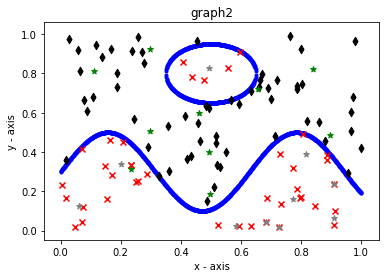

In [15]:
Y1 = (1/5)*np.sin(10*x_blueline[:]) + 0.3  
Y2 = np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8
Y3 = - np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8

# plotting the points  
plt.scatter(x_blueline, Y1, marker = ".", color = "blue") 
plt.scatter(x_blueline, Y2, marker = ".", color = "blue")
plt.scatter(x_blueline, Y3, marker = ".", color = "blue")

# finding d labels:
for i in range(100):
    if d[i] == 1:
        plt.scatter(X[i,0],X[i,1], color = "red", marker = "x")
    else:
        plt.scatter(X[i,0],X[i,1], color = "black", marker = "d")
for i in range(10):
    plt.scatter(randomCentersC[i][0],randomCentersC[i][1], color = "green", marker = "*")
    plt.scatter(randomCentersC1[i][0],randomCentersC1[i][1], color = "gray", marker = "*")
  
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('graph2') 
plt.show() 

### Training

In [17]:
omegaInit = (1-(-1))*np.random.random_sample((20)) - 1
b = (1-(-1))*np.random.random_sample((20)) + 1

In [18]:
LP = 1/400
omega = np.copy(omegaInit)
centersCombined = np.concatenate((randomCentersC1, randomCentersC)) 

for g in range(10000): 
    mSUM = 0
    if( g % 1500 == 0):
        LP = LP/2
    for i in range(100): 
        distances = (X[i][0] - centersCombined[:,0])**2 + (X[i][1] - centersCombined[:,1])**2
        outputs = (.5)*np.exp(-distances**2)

        G = np.sign(omega@outputs.T)
        omega[:] = omega[:] + LP*(d[i] - G)*(outputs)
        mSUM += (d[i] - G)**2            
    print(mSUM)

print(omega)    
    

120.0
140.0
144.0
144.0
136.0
136.0
132.0
136.0
128.0
128.0
128.0
120.0
120.0
112.0
112.0
108.0
112.0
104.0
104.0
104.0
100.0
104.0
96.0
96.0
96.0
100.0
96.0
96.0
96.0
100.0
96.0
96.0
100.0
96.0
96.0
96.0
92.0
96.0
92.0
88.0
96.0
92.0
88.0
88.0
88.0
92.0
88.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
88.0
84.0
80.0
84.0
80.0
80.0
76.0
80.0
76.0
80.0
76.0
80.0
72.0
76.0
72.0
76.0
72.0
76.0
72.0
76.0
72.0
76.0
72.0
76.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
68.0
72.0
64.0
68.0
72.0
68.0
72.0
72.0
68.0
80.0
68.0
72.0
80.0
72.0
72.0
60.0
64.0
80.0
72.0
72.0
72.0
60.0
72.0
72.0
72.0
64.0
72.0
64.0
64.0
72.0
68.0
72.0
72.0
72.0
72.0
68.0
72.0
72.0
72.0
76.0
80.0
80.0
72.0
68.0


72.0
64.0
68.0
72.0
72.0
64.0
72.0
68.0
64.0
72.0
64.0
72.0
68.0
64.0
64.0
64.0
64.0
72.0
64.0
72.0
68.0
64.0
72.0
72.0
72.0
76.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
72.0
68.0
64.0
72.0
72.0
72.0
68.0
72.0
64.0
64.0
72.0
76.0
72.0
72.0
64.0
68.0
72.0
72.0
64.0
72.0
76.0
72.0
64.0
64.0
72.0
76.0
72.0
72.0
72.0
64.0
64.0
64.0
64.0
64.0
72.0
68.0
64.0
64.0
64.0
72.0
76.0
72.0
72.0
72.0
72.0
68.0
72.0
72.0
64.0
72.0
76.0
72.0
72.0
64.0
72.0
76.0
72.0
72.0
72.0
72.0
68.0
72.0
64.0
64.0
72.0
76.0
72.0
72.0
64.0
64.0
72.0
76.0
72.0
64.0
64.0
72.0
76.0
72.0
72.0
64.0
64.0
72.0
76.0
72.0
72.0
64.0
72.0
76.0
72.0
64.0
64.0
64.0
72.0
76.0
72.0
64.0
64.0
64.0
72.0
76.0
72.0
72.0
64.0
72.0
76.0
72.0
72.0
64.0
64.0
64.0
72.0
76.0
64.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
72.0
76.0
72.0
64.0
64.0
72.0
76.0
64.0
72.0
72.0
64.0
72.0
76.0
72.0
72.0
64.0
72.0
68.0
64.0
72.0
64.0
72.0
76.0
64.0
72.0
64.0
64.0
72.0
64.0
72.0
76.0
64.0
64.0
64.0
72.0
68.0
64.0
72.0
64.0
72.0
76.0
64.0
64.0
72.0
64.0
64.0
64.0


72.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
48.0
56.0
64.0
56.0
72.0
68.0
64.0
64.0
56.0
48.0
56.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
56.0
48.0
56.0
56.0
56.0
64.0
72.0
68.0
64.0
64.0
56.0
48.0
64.0
56.0
64.0
68.0
72.0
80.0
64.0
64.0
56.0
48.0
48.0
64.0
56.0
72.0
68.0
64.0
64.0
56.0
48.0
48.0
56.0
56.0
56.0
64.0
72.0
68.0
64.0
64.0
56.0
48.0
56.0
56.0
64.0
72.0
68.0
72.0
72.0
56.0
56.0
48.0
48.0
64.0
56.0
64.0
72.0
68.0
64.0
64.0
56.0
48.0
64.0
64.0
64.0
68.0
72.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
48.0
48.0
64.0
56.0
64.0
72.0
68.0
64.0
64.0
56.0
48.0
48.0
64.0
64.0
72.0
68.0
72.0
80.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
72.0
68.0
72.0
80.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
48.0
48.0
64.0
56.0
72.0
68.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
64.0
68.0
72.0
64.0
64.0
48.0
56.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
48.0
48.0
64.0
56.0
72.0
72.0
68.0
64.0
64.0
56.0
48.0
48.0
64.0
56.0
72.0
68.0


56.0
56.0
60.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
48.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
48.0
48.0
48.0
48.0
56.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
60.0
56.0
48.0
48.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
48.0
48.0
56.0
56.0
56.0
56.0
56.0
56.0


64.0
56.0
56.0
60.0
52.0
60.0
56.0
52.0
60.0
56.0
52.0
60.0
56.0
52.0
60.0
56.0
52.0
60.0
56.0
60.0
60.0
56.0
64.0
64.0
64.0
64.0
48.0
60.0
56.0
64.0
64.0
64.0
64.0
56.0
60.0
56.0
64.0
64.0
64.0
64.0
64.0
56.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
56.0
56.0
60.0
56.0
52.0
60.0
56.0
52.0
60.0
56.0
52.0
60.0
64.0
64.0
64.0
64.0
56.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
48.0
60.0
52.0
60.0
56.0
52.0
60.0
64.0
64.0
64.0
64.0
56.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
48.0
60.0
52.0
60.0
56.0
52.0
60.0
64.0
64.0
64.0
64.0
56.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
48.0
60.0
52.0
60.0
56.0
52.0
60.0
64.0
64.0
64.0
64.0
48.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
56.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
48.0
56.0
56.0
60.0
64.0
64.0
64.0
64.0
64.0
48.0
56.0
56.0
60.0
56.0
52.0
60.0
56.0
52.0
60.0
64.0
64.0
64.0
64.0
56.0
48.0
60.0
52.0
60.0
56.0
52.0
60.0
64.0
64.0
64.0
64.0
48.0
56.0
60.0
64.0
64.0
64.0
64.0


64.0
68.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
64.0
68.0
72.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
64.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
64.0
68.0
72.0
72.0
64.0
56.0
64.0
68.0
72.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
64.0
56.0
64.0
68.0
72.0
72.0
64.0
56.0
64.0
64.0
68.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0
64.0
64.0
64.0
64.0
64.0
72.0
64.0
64.0
56.0
64.0
68.0
72.0
72.0
64.0
56.0
64.0
64.0
68.0
72.0
64.0
56.0
56.0
64.0
68.0
72.0


72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
72.0
64.0
64.0
64.0
76.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
72.0
64.0
64.0
64.0
76.0
72.0
72.0
64.0
64.0
68.0
72.0
72.0
72.0
72.0
64.0
64.0
68.0
72.0
[ 0.16411527 -0.45687393  0.51651398  0.78212256 -0.31468435  0.13940853
 -0.40915764 -0.61301856 -0.03245828  0.15756695 -0.93946255  0.14242397
  0.41328562  0.46958111 -0.4334572   0.11792804  0.55643983  0.17310318
 -0.2417563  -0.22277909]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


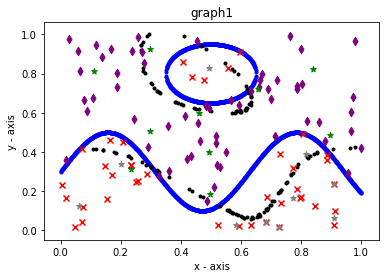

In [21]:
mapper = np.random.rand(10000,2)
# corresponding y axis values 
Y = (1/5)*np.sin(10*x_blueline[:]) + 0.3  
Y2 = np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8
Y3 = - np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8


# plotting the perfect boundries  
plt.scatter(x_blueline, Y1, marker = ".", color = "blue") 
plt.scatter(x_blueline, Y2, marker = ".", color = "blue")
plt.scatter(x_blueline, Y3, marker = ".", color = "blue")

for i in range(10000): #go through each input
    distances = (mapper[i,0] - centersCombined[:,0])**2 + (mapper[i,1] - centersCombined[:,1])**2
    outputs = (5)*np.exp(-distances**2)

    G = omega@outputs.T #contains the final answer without using sign function
    if( G < .001 and G > -.001):
        plt.scatter(mapper[i,0], mapper[i,1], marker = ".", color = "black")


# finding d labels:
for i in range(100):
    if d[i] == 1:
        plt.scatter(X[i,0],X[i,1], color = "red", marker = "x")
    else:
        plt.scatter(X[i,0],X[i,1], color = "purple", marker = "d")
for i in range(10):
    plt.scatter(randomCentersC[i][0],randomCentersC[i][1], color = "green", marker = "*")
    plt.scatter(randomCentersC1[i][0],randomCentersC1[i][1], color = "gray", marker = "*")
  
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('graph1') 
plt.show() 

# Using only 4 centroids total:

In [23]:

initPosCenters = random.sample(ones, k=2)
C1 = [[X[i][0], X[i][1]] for i in range(100) if d[i] == 1]
randomCentersC1 =  X[initPosCenters[:]]

###### find centers for C1...
for k in range(5): #run the algorithm 5 times 
    weights = np.zeros((2,3))
    for x in C1:
        #for each point find which center its closest to
        minDist = sys.float_info.max
        index = 0;
        for j in randomCentersC1:
            dist = (x[0] - j[0])**2 + (x[1] - j[1])**2
            if dist < minDist:
                minDist = dist
                minDistIndex = index
            index += 1

        weights[minDistIndex][0] += x[0]
        weights[minDistIndex][1] += x[1]
        weights[minDistIndex][2] += 1
#     print("cur update: ", weights)
    for j in range(2): 
        randomCentersC1[j][0] = weights[j][0] / weights[j][2]
        randomCentersC1[j][1] = weights[j][1] / weights[j][2]

    print("centroids: ", randomCentersC1) 

centroids:  [[0.51783503 0.19462482]
 [0.36460755 0.68303612]]
centroids:  [[0.51783503 0.19462482]
 [0.36460755 0.68303612]]
centroids:  [[0.51783503 0.19462482]
 [0.36460755 0.68303612]]
centroids:  [[0.51783503 0.19462482]
 [0.36460755 0.68303612]]
centroids:  [[0.51783503 0.19462482]
 [0.36460755 0.68303612]]


In [201]:
# C-1 K means
negOnesList = [i for i in range(100) if d[i] == -1]
initNegCenters = random.sample(negOnesList, k=2)
C_1 = [X[i] for i in range(100) if d[i] == -1]

randomCentersC_1 =  X[initNegCenters[:]]

weights = np.zeros((2,3))
###### find centers for C2...
for k in range(5): #run the algorithm 5 times ... sufficient for this k means problem set
    weights = np.zeros((2,3))
    for x in C_1:#for each point find which center its closest to
        minDist = sys.float_info.max
        index = 0;
        for j in randomCentersC_1:
            dist = (x[0] - j[0])**2 + (x[1] - j[1])**2
            if dist < minDist:
                minDist = dist
                minDistIndex = index
            index += 1
        #now have minimal distance and its related index
        #add this to the corresponding center for averaging...
        weights[minDistIndex][0] += x[0]
        weights[minDistIndex][1] += x[1]
        weights[minDistIndex][2] += 1
#     print("updated weights: ", weights)

    for i in range(2): 
        randomCentersC_1[i][0] = weights[i][0] / weights[i][2]
        randomCentersC_1[i][1] = weights[i][1] / weights[i][2]

    print("updated C-1 centers: ", randomCentersC_1)

updated C-1 centers:  [[ 0.21605585  0.75855652]
 [ 0.71568364  0.57435836]]
updated C-1 centers:  [[ 0.21251956  0.72861755]
 [ 0.73157649  0.58960907]]
updated C-1 centers:  [[ 0.22650498  0.70875397]
 [ 0.75044813  0.59698906]]
updated C-1 centers:  [[ 0.23268122  0.69672298]
 [ 0.7607719   0.60360974]]
updated C-1 centers:  [[ 0.23998421  0.68648072]
 [ 0.77035687  0.60978889]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


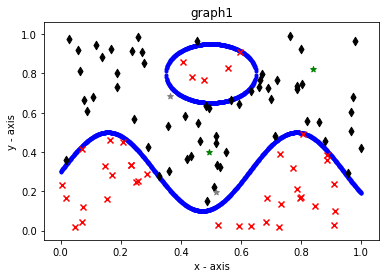

In [24]:
# corresponding y axis values 
Y = (1/5)*np.sin(10*x_blueline[:]) + 0.3  
Y2 = np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8
Y3 = - np.sqrt(.15**2 - (x_blueline[:] - .5)**2) + .8

# plotting the points  
plt.scatter(x_blueline, Y1, marker = ".", color = "blue") 
plt.scatter(x_blueline, Y2, marker = ".", color = "blue")
plt.scatter(x_blueline, Y3, marker = ".", color = "blue")

# finding d labels:
for i in range(100):
    if d[i] == 1:
        plt.scatter(X[i,0],X[i,1], color = "red", marker = "x")
    else:
        plt.scatter(X[i,0],X[i,1], color = "black", marker = "d")
for i in range(2):
    plt.scatter(randomCentersC[i][0],randomCentersC[i][1], color = "green", marker = "*")
    plt.scatter(randomCentersC1[i][0],randomCentersC1[i][1], color = "gray", marker = "*")
  
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('graph1') 
plt.show() 

## ABOVE: it can already be seen that with 4 centroids total we will have issues. One of our centroids did not make it into the circle and is in the area that is -1 when it probably should be in the area that is 1.